# Networkx Basics

In [1]:
from string import ascii_uppercase
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
G = nx.Graph()

In [3]:
G.add_nodes_from(ascii_uppercase[:5])

In [4]:
G.add_edges_from([('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'),
                  ('D', 'E')])

In [5]:
print(G.number_of_nodes())
print(G.number_of_edges())

5
6


In [6]:
list(G.nodes)

['A', 'B', 'C', 'D', 'E']

In [7]:
list(G.edges)

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('D', 'E')]

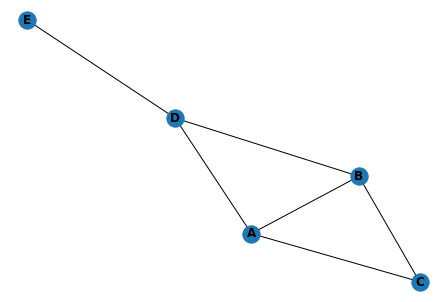

In [8]:
nx.draw(G, with_labels=True, font_weight='bold')

In [9]:
def parity(n):
    if n % 2 == 0:
        return 'Even'
    else:
        return 'Odd'

node_attributes = [(n, {'parity': parity(n)}) for n in range(10)]
node_attributes

[(0, {'parity': 'Even'}),
 (1, {'parity': 'Odd'}),
 (2, {'parity': 'Even'}),
 (3, {'parity': 'Odd'}),
 (4, {'parity': 'Even'}),
 (5, {'parity': 'Odd'}),
 (6, {'parity': 'Even'}),
 (7, {'parity': 'Odd'}),
 (8, {'parity': 'Even'}),
 (9, {'parity': 'Odd'})]

In [10]:
edge_attributes = [(i, j, {'value': i+j}) for i in range(4) for j in range(4, 10)]
edge_attributes

[(0, 4, {'value': 4}),
 (0, 5, {'value': 5}),
 (0, 6, {'value': 6}),
 (0, 7, {'value': 7}),
 (0, 8, {'value': 8}),
 (0, 9, {'value': 9}),
 (1, 4, {'value': 5}),
 (1, 5, {'value': 6}),
 (1, 6, {'value': 7}),
 (1, 7, {'value': 8}),
 (1, 8, {'value': 9}),
 (1, 9, {'value': 10}),
 (2, 4, {'value': 6}),
 (2, 5, {'value': 7}),
 (2, 6, {'value': 8}),
 (2, 7, {'value': 9}),
 (2, 8, {'value': 10}),
 (2, 9, {'value': 11}),
 (3, 4, {'value': 7}),
 (3, 5, {'value': 8}),
 (3, 6, {'value': 9}),
 (3, 7, {'value': 10}),
 (3, 8, {'value': 11}),
 (3, 9, {'value': 12})]

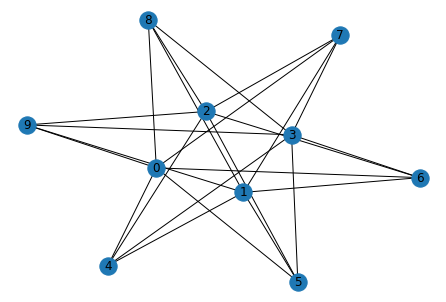

In [11]:
H = nx.Graph()
H.add_nodes_from(node_attributes)
H.add_edges_from(edge_attributes)
nx.draw(H, with_labels=True)

## Weisfeiler-Lehman hashing

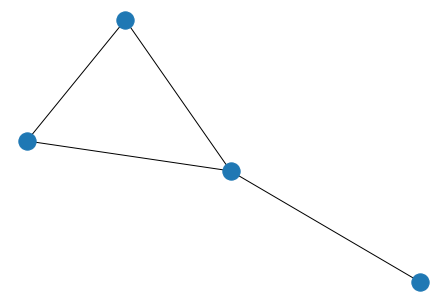

In [12]:
G1 = nx.Graph()
G1.add_edges_from(
    [
        (1, 2, {"label": "A"}),
        (2, 3, {"label": "A"}),
        (3, 1, {"label": "A"}),
        (1, 4, {"label": "B"}),
    ]
)

nx.draw(G1)

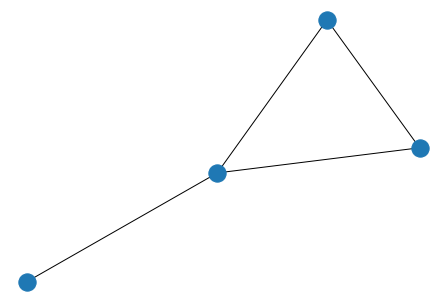

In [13]:
G2 = nx.Graph()
G2.add_edges_from(
    [
        (5, 6, {"label": "B"}),
        (6, 7, {"label": "A"}),
        (7, 5, {"label": "A"}),
        (7, 8, {"label": "A"}),
    ]
)

nx.draw(G2)

In [14]:
wl1 = nx.algorithms.weisfeiler_lehman_graph_hash(G1)
wl2 = nx.algorithms.weisfeiler_lehman_graph_hash(G2)
wl1 == wl2

True

## Example where Weisfeiler Lehman fails

The two graphs below are not isomorphic, but their Weisfeiler-Lehman hashes are identical.

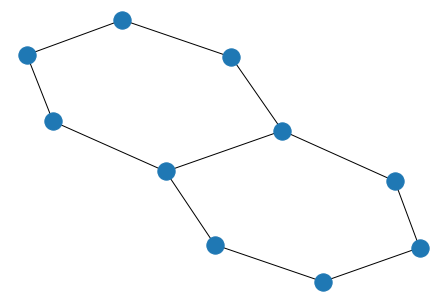

In [16]:
g1 = nx.Graph()
g1.add_nodes_from(list(range(10)))
g1.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6),
                   (6, 7), (2, 7), (7, 8), (8, 9), (0, 9)])
nx.draw(g1)

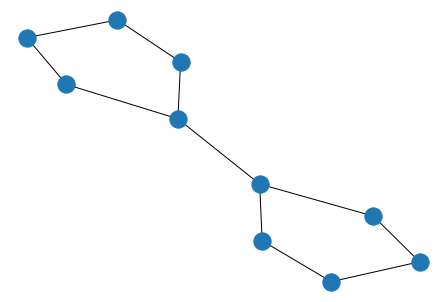

In [18]:
g2 = nx.Graph()
g2.add_nodes_from(list(range(10)))
g2.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4), (4, 0), (2, 5),
                   (5, 6), (6, 7), (7, 8), (8, 9), (9, 5)])
nx.draw(g2)

In [20]:
h1 = nx.algorithms.weisfeiler_lehman_graph_hash(g1)
h2 = nx.algorithms.weisfeiler_lehman_graph_hash(g2)
print(h1 == h2)

True
